In [1]:
import igraph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
import pygraphviz
os.chdir("../src")
from build_network_object import build_network_object
from draw_network_by_classification import draw_network_by_classification, compare_degrees_strength
from draw_adjacency_matrix import draw_adjacency_matrix
from draw_and_print_communities import draw_and_print_communities, compare_comunity_intersection
from correlations import correlation_industry_pairs, correlation_network_degree,correlation_adjacency_matrix
import seaborn as sns
import networkx as nx

In [2]:
label1 = "Table1_Reduced_matrix_2009_2018_flows"
reduced_matrix_2009_2018 = pd.read_csv("../data/"+label1+".csv", index_col=0)

reduced_matrix_2009_2018_flows = reduced_matrix_2009_2018[reduced_matrix_2009_2018['StartIndst']!=0]

sub_matrix_2009_2018_less1 = reduced_matrix_2009_2018_flows[reduced_matrix_2009_2018_flows['weight']<1].sort_values(by=['weight'], ascending=False)
sub_matrix_2009_2018_flows = sub_matrix_2009_2018_less1[sub_matrix_2009_2018_less1['weight']>0].sort_values(by=['weight'], ascending=False)

print ("Number of links:", sub_matrix_2009_2018_flows.shape[0]/2)
print ("Number of 4-digit industries observed:")
print (len(np.unique([sub_matrix_2009_2018_flows['StartIndst'].values,sub_matrix_2009_2018_flows['FinalIndst'].values])))
sub_matrix_2009_2018_flows[1:15]

Number of links: 1153.0
Number of 4-digit industries observed:
356


StartIndst  FinalIndst    weight             SubActivity_StartIndst  \
4302        4611        4623  0.999931    Agriculture, animals, raw goods   
4281        2732        2731  0.999828   Other electronic, electric wires   
4221        2731        2732  0.999821                 Fibre optic cables   
4186        1813        1712  0.999697      Pre-press, pre-media services   
4137        1712        1813  0.999649                  Paper, paperboard   
3986        3040        3311  0.999642         Military fighting vehicles   
4169        2899        2620  0.999599                              Other   
4218        2620        2899  0.999597    Computers, peripheral equipment   
4276        2312        2311  0.999567     Flat glass shaping, processing   
4304        3311        3040  0.999539          Fabricated metal products   
3962        2311        2312  0.999526             Flat glass manufacture   
4204         812        2362  0.999505   Gravel, sand pits; clays, kaolin   
4182        2362         812  0.999501  Plaster products for construction   
4150        2814        2812  0.999479                 Other taps, valves   

                 SubActivity_FinalIndst              MainActivity_StartIndst  \
4302                       Live animals             Fee/contract - wholesale   
4281                 Fibre optic cables                 Electrical equipment   
4221   Other electronic, electric wires                 Electrical equipment   
4186                  Paper, paperboard                             Printing   
4137      Pre-press, pre-media services             Paper and paper products   
3986          Fabricated metal products            Other transport equipment   
4169    Computers, peripheral equipment            Special purpose machinery   
4218                              Other        Computer, electronic, optical   
4276             Flat glass manufacture                       Glass products   
4304         Military fighting vehicles  Repair/installation excl. household   
3962     Flat glass shaping, processing                       Glass products   
4204  Plaster products for construction          Mining, Quarrying and other   
4182   Gravel, sand pits; clays, kaolin         Concrete, cement and plaster   
4150              Fluid power equipment                    General machinery   

                  MainActivity_FinalIndst  \
4302               Agricultural wholesale   
4281                 Electrical equipment   
4221                 Electrical equipment   
4186             Paper and paper products   
4137                             Printing   
3986  Repair/installation excl. household   
4169        Computer, electronic, optical   
4218            Special purpose machinery   
4276                       Glass products   
4304            Other transport equipment   
3962                       Glass products   
4204         Concrete, cement and plaster   
4182          Mining, Quarrying and other   
4150                    General machinery   

                                MainIndustry_StartIndst  \
4302  Wholesale and retail,motor vehicle repair,sale...   
4281  Manufacture computer, electronic, light electr...   
4221  Manufacture computer, electronic, light electr...   
4186                            All other Manufacturing   
4137                            All other Manufacturing   
3986          Manufacture machinery, vehicle, transport   
4169          Manufacture machinery, vehicle, transport   
4218  Manufacture computer, electronic, light electr...   
4276                            All other Manufacturing   
4304          Machinery repair excluding motor vehicles   
3962                            All other Manufacturing   
4204  Mining, Quarrying (inc extraction of petroleum...   
4182                            All other Manufacturing   
4150          Manufacture machinery, vehicle, transport   

                                MainIndustry_FinalIndst  Counts  
4302  Wholesale and r

In [3]:
label1 = "Node_list_SR_Sept_2019"
manchester_matrix_2009_2018 = pd.read_csv("../data/"+label1+".csv", index_col=0)

manchester_matrix_2009_2018['StartIndst'] = manchester_matrix_2009_2018.index

manchester_matrix_2009_2018.shape

manchester_matrix_2009_2018

Label  community  employment_count    lq  \
Id                                                                       
161               Support crop prod        1.0             150.0  0.34   
162             Support animal prod        1.0             150.0  0.49   
170                         Hunting        1.0              40.0  0.91   
210                     Siviculture        1.0             100.0  0.28   
240                Forestry support        1.0             100.0  0.65   
311                  Marine fishing        3.0              10.0  0.06   
899                    Other mining        1.0               5.0  0.13   
910   Petrol gas extraction support        6.0              40.0  0.05   
1011                Meat processing        2.0             600.0  0.57   
1012             Poultry processing        2.0             150.0  0.15   
1013        Poultry meat production        2.0            1000.0  0.73   
1020                Fish processing        2.0             150.0  0.21   
1032                   Juice making        2.0              40.0  0.73   
1039           Fruit veg processing        2.0            1000.0  1.03   
1051                        Dairies        2.0            1250.0  1.57   
1052                      Ice-cream        2.0             100.0  0.57   
1061                Grain mill manu        2.0             800.0  2.02   
1071                     Bread manu        2.0            6000.0  1.84   
1072            Rusks biscuits manu        2.0            2500.0  2.47   
1073             Pasta noodles manu        2.0             150.0  4.86   
1082          Chocolate sweets manu        2.0             125.0  0.18   
1083          Tea coffee processing        2.0             200.0  0.76   
1084                 Condiment manu        2.0             900.0  2.55   
1085            Prepared meals manu        2.0            2250.0  1.76   
1089                Other food manu        2.0            1250.0  0.83   
1101                   Distilleries        2.0              15.0  0.04   
1105                      Breweries        2.0             700.0  0.99   
1107                Soft drink manu        2.0             300.0  0.57   
1310                       Spinning        7.0             200.0  1.51   
1320                Textile weaving        7.0             500.0  1.62   
...                             ...        ...               ...   ...   
9604                      Wellbeing        2.0             250.0  0.63   
9609        Other personal services        8.0            4000.0  0.93   
111                             NaN        NaN               NaN   NaN   
113                             NaN        NaN               NaN   NaN   
150                             NaN        NaN               NaN   NaN   
141                             NaN        NaN               NaN   NaN   
147                             NaN        NaN               NaN   NaN   
119                             NaN        NaN               NaN   NaN   
143                             NaN        NaN               NaN   NaN   
142                             NaN        NaN               NaN   NaN   
145                             NaN        NaN               NaN   NaN   
130                             NaN        NaN               NaN   NaN   
121                             NaN        NaN               NaN   NaN   
149                             NaN        NaN               NaN   NaN   
3831                            NaN        NaN               NaN   NaN   
510                             NaN        NaN               NaN   NaN   
3530                            NaN        NaN               NaN   NaN   
610                             NaN        NaN               NaN   NaN   
729                             NaN        NaN               NaN   NaN   
2592                            NaN        NaN               NaN   NaN   
2571                            NaN        NaN               NaN   NaN   
2060                            Na

In [4]:
result = pd.merge(manchester_matrix_2009_2018[['Label','StartIndst','employment_count','lq_true','lq']],sub_matrix_2009_2018_flows,on=['StartIndst'],how='outer')

result['LabelStartIndst'] = result['Label']
result['EmploymentCountStartIndst'] = result['employment_count']
result['LqStartIndst'] = result['lq_true']



result.drop(['Label','employment_count','lq_true'],axis=1,inplace=True)

result.head()

StartIndst    lq  FinalIndst  weight SubActivity_StartIndst  \
0         161  0.34         NaN     NaN                    NaN   
1         162  0.49         NaN     NaN                    NaN   
2         170  0.91         NaN     NaN                    NaN   
3         210  0.28         NaN     NaN                    NaN   
4         240  0.65         NaN     NaN                    NaN   

  SubActivity_FinalIndst MainActivity_StartIndst MainActivity_FinalIndst  \
0                    NaN                     NaN                     NaN   
1                    NaN                     NaN                     NaN   
2                    NaN                     NaN                     NaN   
3                    NaN                     NaN                     NaN   
4                    NaN                     NaN                     NaN   

  MainIndustry_StartIndst MainIndustry_FinalIndst  Counts  \
0                     NaN                     NaN     NaN   
1                     NaN                     NaN     NaN   
2                     NaN                     NaN     NaN   
3                     NaN                     NaN     NaN   
4                     NaN                     NaN     NaN   

       LabelStartIndst  EmploymentCountStartIndst  LqStartIndst  
0    Support crop prod                      150.0           0.0  
1  Support animal prod                      150.0           0.0  
2              Hunting                       40.0           0.0  
3          Siviculture                      100.0           0.0  
4     Forestry support                      100.0           0.0

In [5]:
manchester_matrix_2009_2018['FinalIndst'] = manchester_matrix_2009_2018.index

result_final = pd.merge(manchester_matrix_2009_2018[['Label','FinalIndst','employment_count','lq_true']],result,on=['FinalIndst'],how='outer')

result_final['LabelFinalIndst'] = result_final['Label']
result_final['EmploymentCountFinalIndst'] = result_final['employment_count']
result_final['LqFinalIndst'] = result_final['lq_true']


result_final.drop(['Label','employment_count','lq_true'],axis=1,inplace=True)


result_final.head()

FinalIndst  StartIndst  lq  weight SubActivity_StartIndst  \
0       161.0         NaN NaN     NaN                    NaN   
1       162.0         NaN NaN     NaN                    NaN   
2       170.0         NaN NaN     NaN                    NaN   
3       210.0         NaN NaN     NaN                    NaN   
4       240.0         NaN NaN     NaN                    NaN   

  SubActivity_FinalIndst MainActivity_StartIndst MainActivity_FinalIndst  \
0                    NaN                     NaN                     NaN   
1                    NaN                     NaN                     NaN   
2                    NaN                     NaN                     NaN   
3                    NaN                     NaN                     NaN   
4                    NaN                     NaN                     NaN   

  MainIndustry_StartIndst MainIndustry_FinalIndst  Counts LabelStartIndst  \
0                     NaN                     NaN     NaN             NaN   
1                     NaN                     NaN     NaN             NaN   
2                     NaN                     NaN     NaN             NaN   
3                     NaN                     NaN     NaN             NaN   
4                     NaN                     NaN     NaN             NaN   

   EmploymentCountStartIndst  LqStartIndst      LabelFinalIndst  \
0                        NaN           NaN    Support crop prod   
1                        NaN           NaN  Support animal prod   
2                        NaN           NaN              Hunting   
3                        NaN           NaN          Siviculture   
4                        NaN           NaN     Forestry support   

   EmploymentCountFinalIndst  LqFinalIndst  
0                      150.0           0.0  
1                      150.0           0.0  
2                       40.0           0.0  
3                      100.0           0.0  
4                      100.0           0.0

In [6]:
result_final['isManchester'] = result_final['LqFinalIndst'] + result_final['LqStartIndst']

result_final_onlyMan = result_final[result_final['isManchester']==2]
result_final_notMan = result_final[result_final['isManchester']!=2]

In [7]:
import networkx as netx


# In case you graph is undirected

network_largest_2009_2018_notMan= build_network_object(result_final_notMan,'weight')

network_largest_2009_2018_nx_notMan = netx.Graph()

main_activity = []
main_industry = []
for node in network_largest_2009_2018_notMan.vs:
    
    network_largest_2009_2018_nx_notMan.add_node(node['subactivity'],mainactivity = node['mainactivity'],mainindustry=node['mainindustry'])
    main_activity.append(node['mainactivity'])
    main_industry.append(node['mainindustry'])

    
for edge in network_largest_2009_2018_notMan.es:
    
    v1 = network_largest_2009_2018_notMan.vs[edge.tuple[0]]['subactivity']
    v2 = network_largest_2009_2018_notMan.vs[edge.tuple[1]]['subactivity']

    network_largest_2009_2018_nx_notMan.add_edge(v1,v2,weight = edge['weight'],color='red')



In [8]:
import networkx as netx


# In case you graph is undirected

network_largest_2009_2018= build_network_object(result_final_onlyMan,'weight')

network_largest_2009_2018_nx = netx.Graph()

main_activity = []
main_industry = []
for node in network_largest_2009_2018.vs:
    
    network_largest_2009_2018_nx.add_node(node['subactivity'],mainactivity = node['mainactivity'],mainindustry=node['mainindustry'])
    main_activity.append(node['mainactivity'])
    main_industry.append(node['mainindustry'])

    
for edge in network_largest_2009_2018.es:
    
    v1 = network_largest_2009_2018.vs[edge.tuple[0]]['subactivity']
    v2 = network_largest_2009_2018.vs[edge.tuple[1]]['subactivity']

    network_largest_2009_2018_nx.add_edge(v1,v2,weight = edge['weight'],color='red')



network_largest_2008_2018_max_span_tree_manchester = nx.maximum_spanning_tree(network_largest_2009_2018_nx)
weights_manchester = [3*network_largest_2008_2018_max_span_tree_manchester[u][v]['weight'] for u,v in network_largest_2008_2018_max_span_tree_manchester.edges()]
color = ['red' for u,v in network_largest_2008_2018_max_span_tree_manchester.edges()]


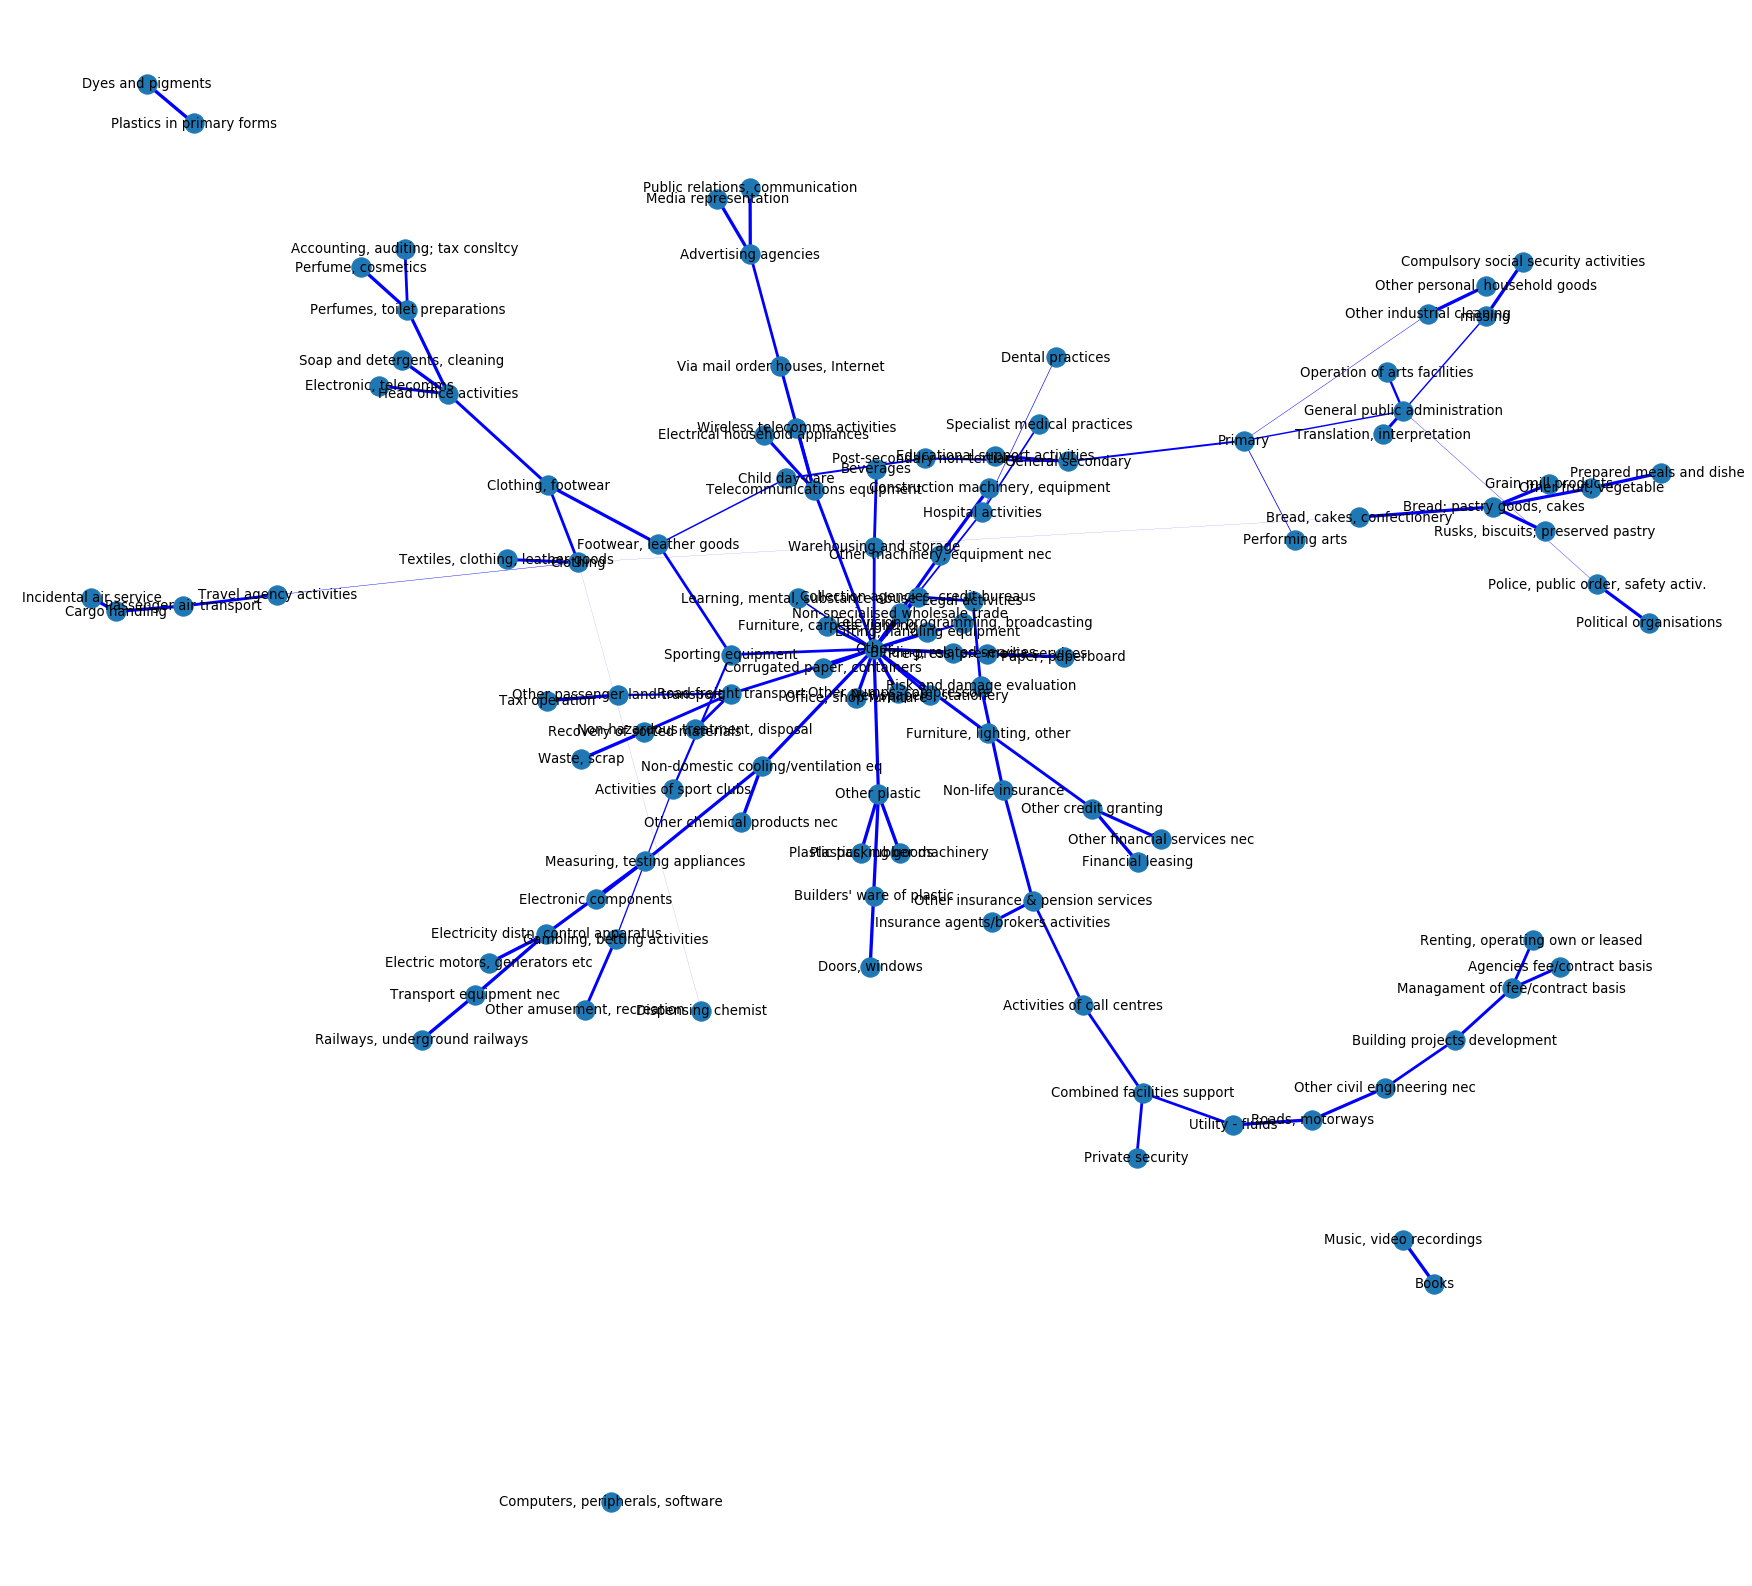

In [9]:


elarge = [(u, v) for (u, v, d) in network_largest_2008_2018_max_span_tree_manchester.edges(data=True) if d['weight'] > 0.0]


fig=plt.figure(figsize=(28, 26), dpi= 80, facecolor='w', edgecolor='k')

pos = nx.spring_layout(network_largest_2008_2018_max_span_tree_manchester)
nx.draw_networkx_nodes(network_largest_2008_2018_max_span_tree_manchester,pos=pos)
nx.draw_networkx_labels(network_largest_2008_2018_max_span_tree_manchester, pos=pos)
nx.draw_networkx_edges(network_largest_2008_2018_max_span_tree_manchester,pos=pos,width=weights_manchester,edgelist=elarge,edge_color = 'blue')


plt.axis('off')
plt.show()

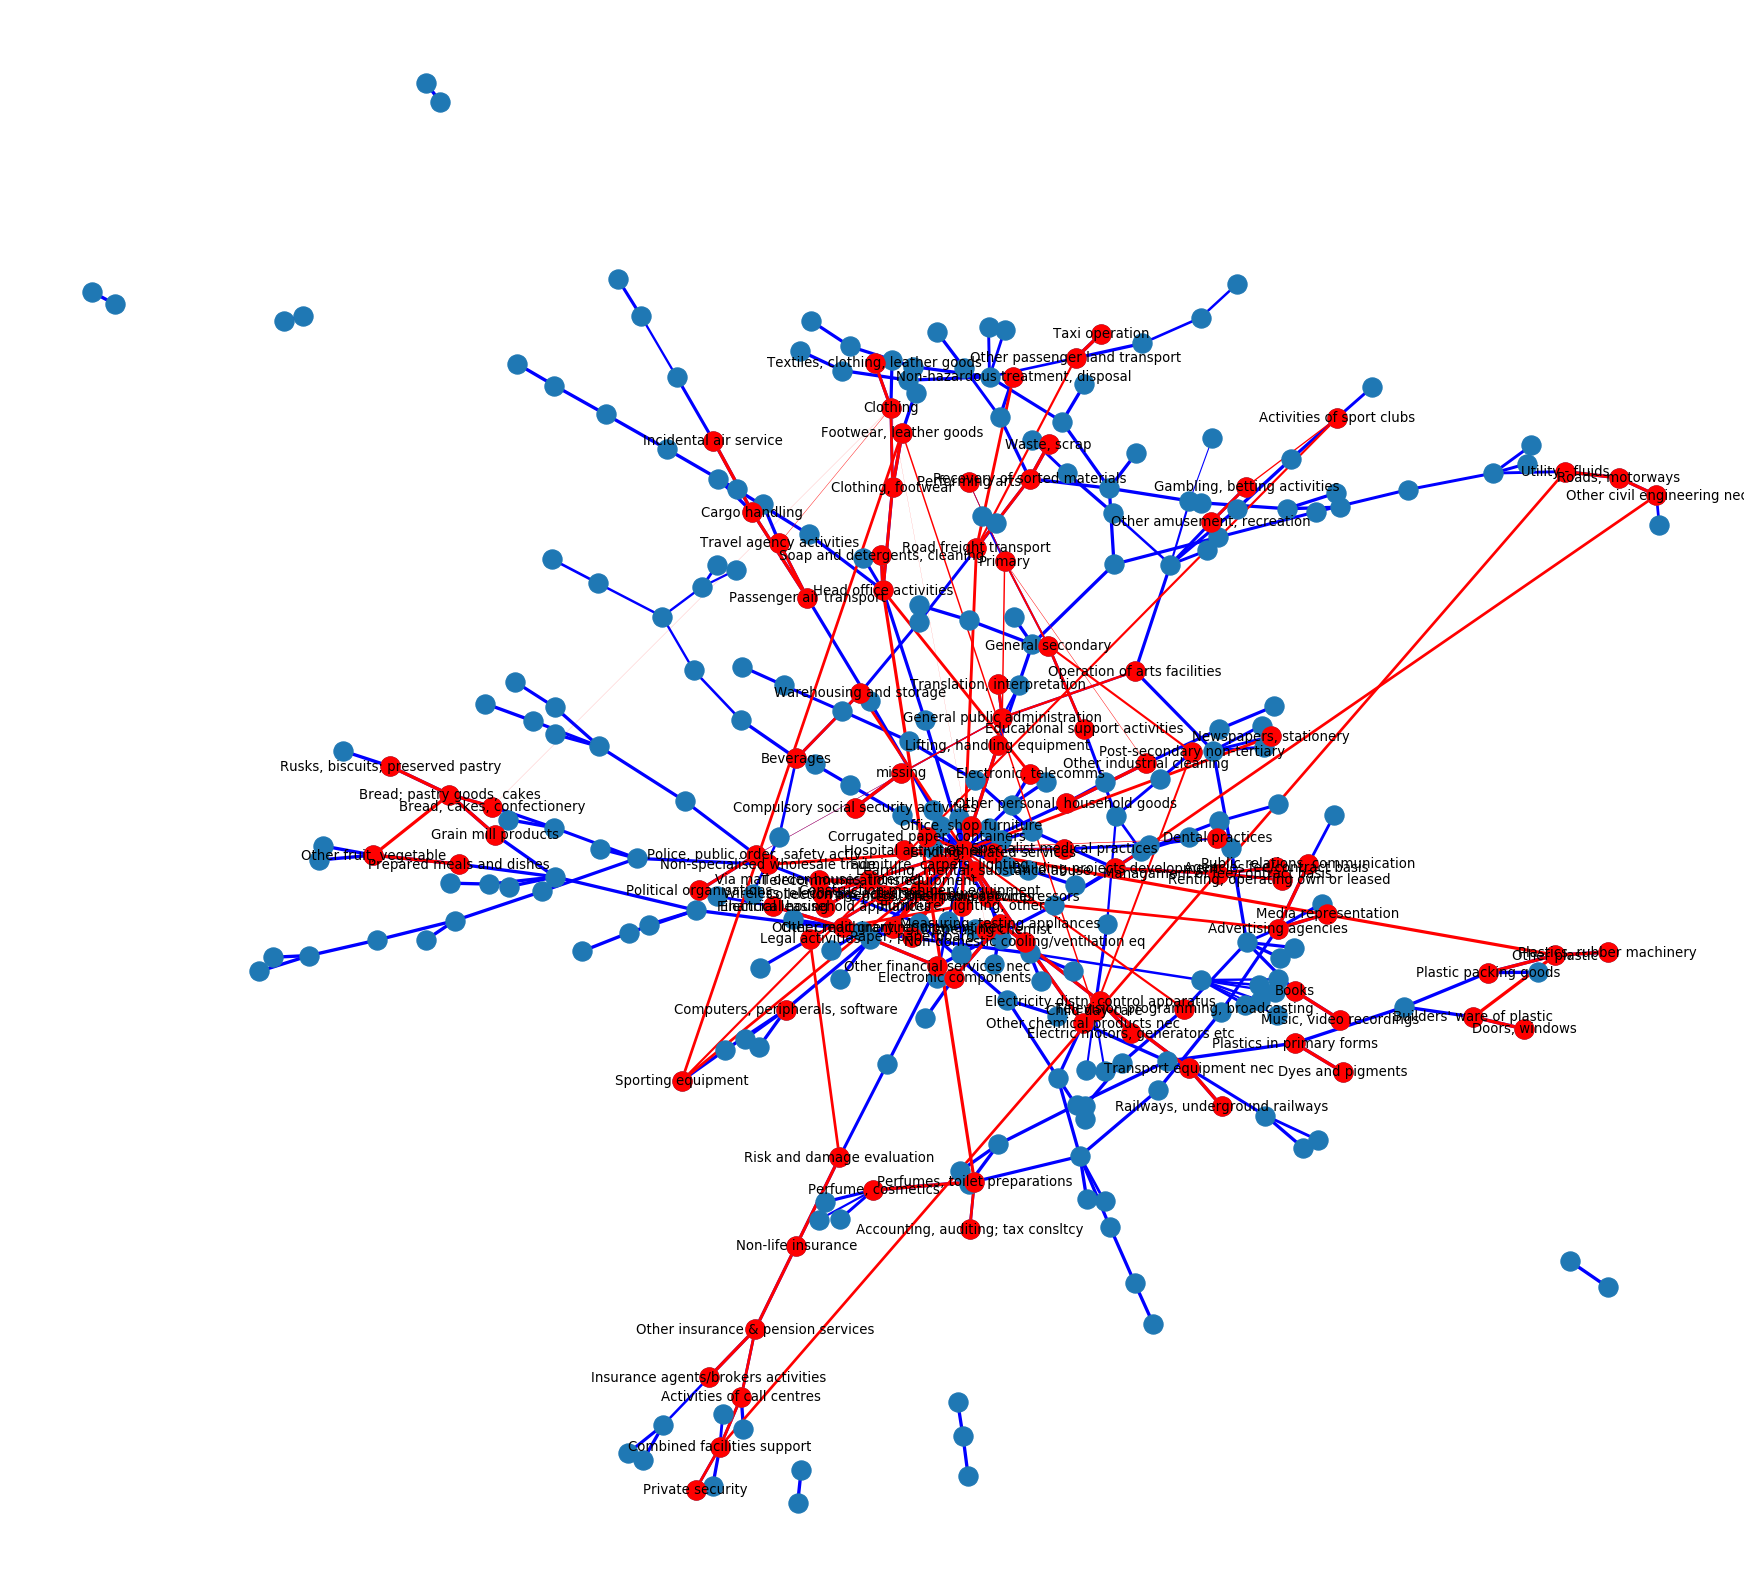

In [10]:
import networkx as netx


# In case you graph is undirected

network_largest_2009_2018= build_network_object(result_final,'weight')

network_largest_2009_2018_nx = netx.Graph()

main_activity = []
main_industry = []
for node in network_largest_2009_2018.vs:
    
    network_largest_2009_2018_nx.add_node(node['subactivity'],mainactivity = node['mainactivity'],mainindustry=node['mainindustry'])
    main_activity.append(node['mainactivity'])
    main_industry.append(node['mainindustry'])

    
for edge in network_largest_2009_2018.es:
    
    v1 = network_largest_2009_2018.vs[edge.tuple[0]]['subactivity']
    v2 = network_largest_2009_2018.vs[edge.tuple[1]]['subactivity']

    network_largest_2009_2018_nx.add_edge(v1,v2,weight = edge['weight'],color='red')



network_largest_2008_2018_max_span_tree = nx.maximum_spanning_tree(network_largest_2009_2018_nx)
weights = [3*network_largest_2008_2018_max_span_tree[u][v]['weight'] for u,v in network_largest_2008_2018_max_span_tree.edges()]
color = ['red' for u,v in network_largest_2008_2018_max_span_tree.edges()]

unique_classes = np.unique(main_industry)
 #assign color for each class
cmap = plt.get_cmap("jet")
colors = [cmap(i) for i in range(0, len(unique_classes))]
color_dict = dict(zip(unique_classes, colors))
color_industry = ['r' for industry in main_industry]


elarge = [(u, v) for (u, v, d) in network_largest_2008_2018_max_span_tree.edges(data=True) if d['weight'] > 0.0]
eman = [(u, v) for (u, v, d) in network_largest_2008_2018_max_span_tree_manchester.edges(data=True) if d['weight'] > 0.]


fig=plt.figure(figsize=(28, 26), dpi= 80, facecolor='w', edgecolor='k')

pos = nx.spring_layout(network_largest_2008_2018_max_span_tree)
nx.draw_networkx_nodes(network_largest_2008_2018_max_span_tree,pos=pos)
nx.draw_networkx_edges(network_largest_2008_2018_max_span_tree,pos=pos,width=weights,edgelist=elarge,edge_color = 'blue')
nx.draw_networkx_nodes(network_largest_2008_2018_max_span_tree_manchester,pos=pos,width=weights,edgelist=eman,node_color = 'red')
nx.draw_networkx_edges(network_largest_2008_2018_max_span_tree_manchester,pos=pos,width=weights_manchester,edgelist=eman,edge_color = 'red')
nx.draw_networkx_labels(network_largest_2008_2018_max_span_tree_manchester, pos=pos)

plt.axis('off')
plt.show()

In [18]:
network_largest_2008_2018_max_span_tree = [network_largest_2008_2018_max_span_tree.subgraph(c) for c in nx.connected_components(network_largest_2008_2018_max_span_tree)][0]
network_largest_2009_2018_nx_notMan = [network_largest_2009_2018_nx_notMan.subgraph(c) for c in nx.connected_components(network_largest_2009_2018_nx_notMan)][0]

elarge = [(u, v) for (u, v, d) in network_largest_2008_2018_max_span_tree.edges(data=True) if d['weight'] > 0.0]
eman = [(u, v) for (u, v, d) in network_largest_2008_2018_max_span_tree_manchester.edges(data=True) if d['weight'] > 0.0]

elarge_node = [(u, v) for (u, v, d) in network_largest_2008_2018_max_span_tree.edges(data=True) if d['weight'] > 0.0]
eman_node = [(u, v) for (u, v, d) in network_largest_2008_2018_max_span_tree_manchester.edges(data=True) if d['weight'] > 0.0]



e_not_man = set(elarge_node) - set(eman_node)

fig=plt.figure(figsize=(250, 200), dpi= 80, facecolor='w', edgecolor='k')



pos = nx.nx_agraph.graphviz_layout(network_largest_2008_2018_max_span_tree,prog='sfdp')

nx.draw_networkx_nodes(network_largest_2008_2018_max_span_tree,pos=pos,node_size=200)


nx.draw_networkx_edges(network_largest_2008_2018_max_span_tree,pos=pos,width=weights,edgelist=elarge,edge_color = 'blue')
nx.draw_networkx_nodes(network_largest_2008_2018_max_span_tree_manchester,pos=pos,width=weights_manchester,edgelist=eman,node_color = 'red',node_size=600)
nx.draw_networkx_edges(network_largest_2008_2018_max_span_tree_manchester,pos=pos,width=weights_manchester,edgelist=eman,edge_color = 'red')

nx.draw_networkx_labels(network_largest_2008_2018_max_span_tree_manchester, pos=pos,font_size=45)
nx.draw_networkx_labels(network_largest_2008_2018_max_span_tree, pos=pos,font_size=15,nodelist=e_not_man)

plt.axis('off')
plt.show()


